In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

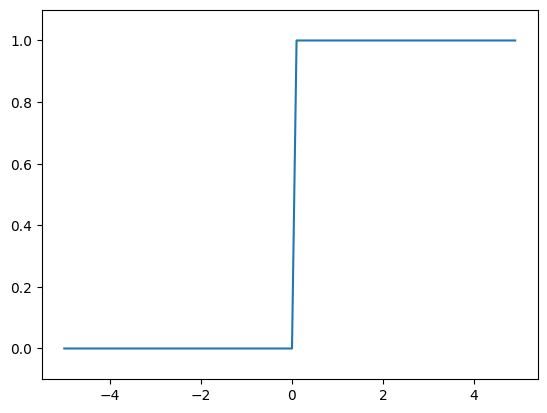

In [ ]:
def step_function(x):
  return np.array( x > 0, dtype=np.int32)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)

plt.ylim(-0.1,1.1)
plt.show()

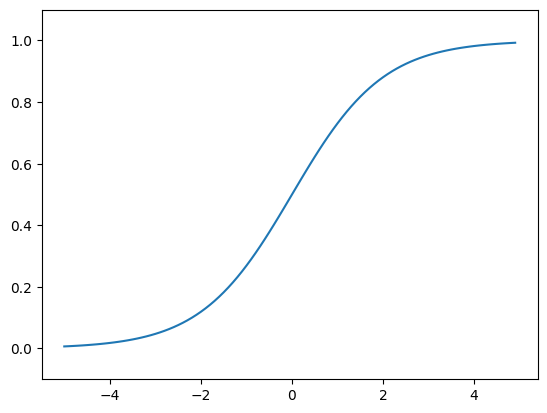

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)

plt.ylim(-0.1,1.1)
plt.show()

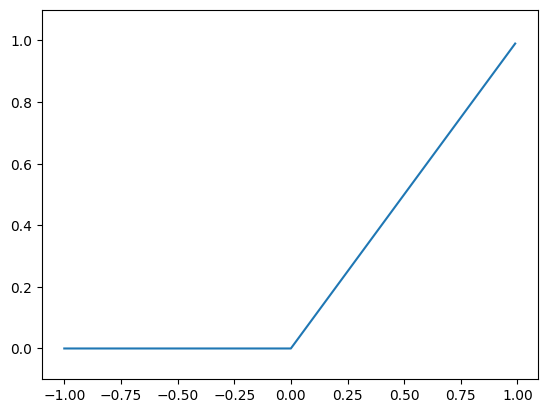

In [ ]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-1.0,1.0,0.01)
y = relu(x)
plt.plot(x,y)

plt.ylim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

In [ ]:
A = np.array([1,2,3,4])
print(A)
np.ndim(A)
A.shape
A.shape[0]

[1 2 3 4]


4

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


행렬곱으로 신경망 만들기

In [ ]:
 X = np.array([1,2])
 W = np.array([[1,3,5],[2,4,6]])
 Y = np.dot(X,W)
 print(Y)

[ 5 11 17]


In [ ]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1



(2, 3)
(2,)
(3,)
[0.2 0.5 0.8]
[0.3 0.7 1.1]


In [ ]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
def identity_function(x):
  return x


w3 = np.array([[0.1,0.3],[0.2,0.4]])
b3 = np.array([0.1,0.2])

A3 = np.dot(Z2,w3) + b3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['B1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['B2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['B3'] = np.array([0.1,0.2])

  return network

def forward(network,x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  B1, B2, B3 = network['B1'], network['B2'], network['B3']

  # 0층
  A1 = np.dot(x,W1) + B1
  # 활성 함수
  Z1 = sigmoid(A1)
  #1층
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #3층
  A3 = np.dot(Z2,W3) + B3
  #출력이므로 활성 함수가 필요 없음
  #항등 함수
  Y = identity_function(A3)
  return Y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)


[0.31682708 0.69627909]


softMAX


In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [ ]:
def softmax(a):
  c = np.max(a)               # 최대값을 구해서 수치 안정성을 위해 빼줌
  exp_a = np.exp(a - c)       # 입력 값을 조정 후 지수 계산
  sum_exp_a = np.sum(exp_a)   # 지수 값들의 합
  y = exp_a / sum_exp_a       # 정규화 (각 값을 합으로 나눔)
  return y

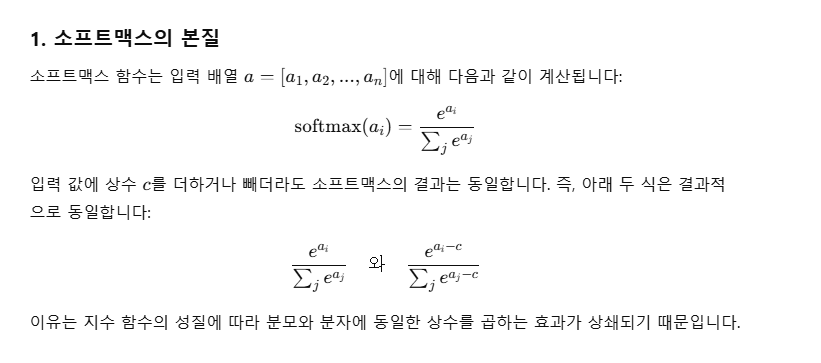